# Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree 
from os import system

# Import Data

In [2]:
data=pd.read_csv("bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# EDA

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
data.replace({"unknown":np.nan}, inplace=True)
data.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [8]:
data=data.fillna(data.mode().iloc[0])

 About 2.5% of the data is missing(excluding poutcome column). I have replaced the unknown variables with the mode of the column. But the poutcome column seems to have 36959 unknown variables(out of 45211) which is extremely high and bad data, hence i have deciced to remove that column.

In [9]:
cdata=data.drop(['poutcome','duration'], axis=1)

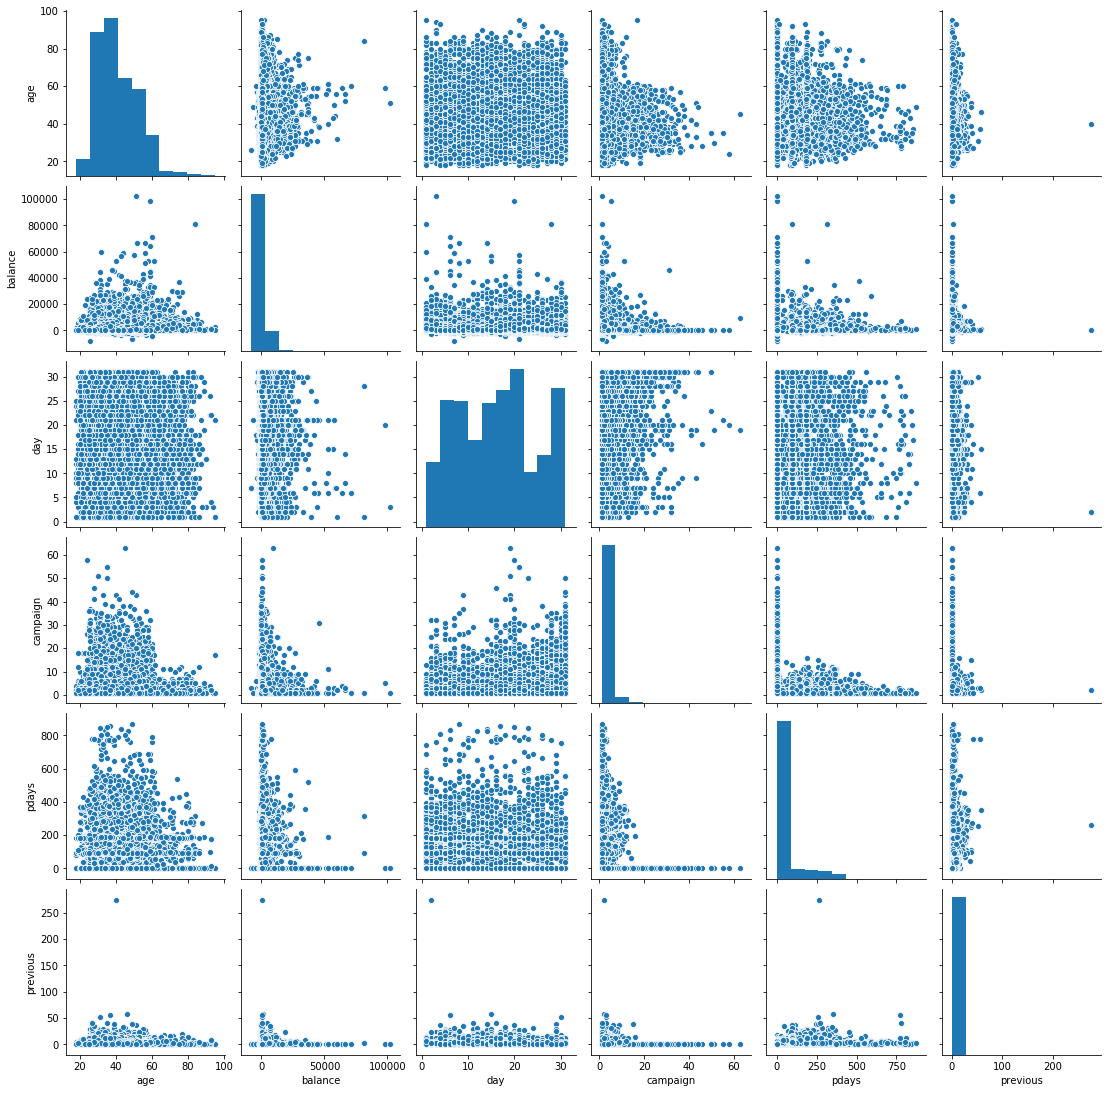

In [10]:
data_attr=cdata.iloc[:,0:14]
sns.pairplot(data_attr)

In [11]:
cdata["education"].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [12]:
cdata['education'] = cdata.education.astype(str)

In [13]:
cleanup_nums = {"job":     {"admin.":1,"blue-collar":2,"entrepreneur":3,"housemaid":4,"management":5,"retired":6,"self-employed":7,"services":8,"student":9,"technician":10,"unemployed":11},
                "marital": {"divorced":1,"married":2,"single":3 },
                "education": {"primary":1,"secondary":2,"tertiary":3,"high.school":4,"illiterate":5,"professional.course":6,"university.degree":7},
                "default": {"no":1,"yes":2},
                "housing": {"no":1,"yes":2},
                "loan": {"no":1,"yes":2},
                "contact": {"cellular":1,"telephone":2},
                "month":{"jan":1, "feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                "Target":{"no":0,"yes":1}
               }

In [14]:
cdata.replace(cleanup_nums, inplace=True)

In [15]:
cdata['education'] = cdata.education.astype(int)
cdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,Target
0,58,5,2,3,1,2143,2,1,1,5,5,1,-1,0,0
1,44,10,3,2,1,29,2,1,1,5,5,1,-1,0,0
2,33,3,2,2,1,2,2,2,1,5,5,1,-1,0,0
3,47,2,2,2,1,1506,2,1,1,5,5,1,-1,0,0
4,33,2,3,2,1,1,1,1,1,5,5,1,-1,0,0


In [16]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int32
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  campaign   45211 non-null  int64
 12  pdays      45211 non-null  int64
 13  previous   45211 non-null  int64
 14  Target     45211 non-null  int64
dtypes: int32(1), int64(14)
memory usage: 5.0 MB


# My Observations:
People between the age 20-60 seem to have higher duration on calls.
People between the age 20-60 seem to be contacted more often for the campaign
people with a lower balance tend to have higher call duration
people with a lower balance are contacted more number of times about the campaign

# Split the Data into test and train

In [17]:
x = cdata.drop(['Target'],axis = 1)
y = cdata[['Target']]


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=4)
y_train.head()

,Target
9725,0
1435,0
24724,0
6376,0
11485,0


In [19]:
n_true=len(data.loc[data['Target']=='yes'])
n_false=len(data.loc[data['Target']=='no'])
truep=n_true/(n_true+n_false)*100
falsep=n_false/(n_true+n_false)*100
print("Number of true cases(People who accepted the Loan)=",n_true,truep,"%")
print("Number of false cases(People who didnt get a Personal Load)=",n_false,falsep,"%")

Number of true cases(People who accepted the Loan)= 5289 11.698480458295547 %
Number of false cases(People who didnt get a Personal Load)= 39922 88.30151954170445 %


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train.values.ravel())
y_predict=model.predict(x_test)

In [21]:
model_score=model.score(x_test,y_test)
print("Model Accuracy=",model_score)

Model Accuracy= 0.8883810085520495


In [22]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
print(cm)

[[   14  1503]
 [   11 12036]]


# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train,y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
nb_train_predict=nb_model.predict(x_train)
print("Model Accuracy on train data: {0:.4f}".format(metrics.accuracy_score(y_train,nb_train_predict)))
print()

Model Accuracy on train data: 0.8368



In [25]:
nb_test_predict=nb_model.predict(x_test)
print("Model Accuracy on test data: {0:.4f}".format(metrics.accuracy_score(y_test,nb_test_predict)))
print()

Model Accuracy on test data: 0.8449



In [26]:
cm=metrics.confusion_matrix(y_test,nb_test_predict,labels=[1,0])
print(cm)

[[  361  1156]
 [  948 11099]]


In [27]:
cm=metrics.confusion_matrix(y_train,nb_train_predict,labels=[1,0])
print(cm)

[[  842  2930]
 [ 2236 25639]]


# KNN

In [28]:
NNH= KNeighborsClassifier(n_neighbors=6,weights='distance')

In [29]:
NNH.fit(x_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

In [30]:
predicted_labels=NNH.predict(x_test)
NNH.score(x_test,y_test)

0.8835889118254202

In [31]:
cm=metrics.confusion_matrix(y_test,predicted_labels,labels=[1,0])
print(cm)

[[  185  1332]
 [  247 11800]]


# Decision Tree

In [32]:
dTree=DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [33]:
print(dTree.score(x_train,y_train))
print(dTree.score(x_test,y_test))

1.0
0.8302123267472722


# Bagging

In [43]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train.values.ravel())


0.8900766735476261


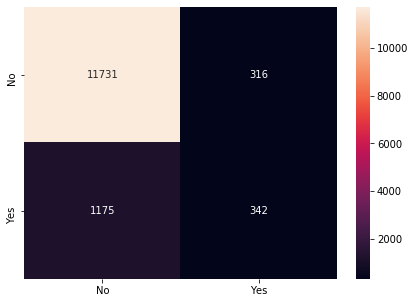

In [35]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


# AdaBoosting

In [42]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dTree,n_estimators=50, random_state=1)
abcl = abcl.fit(x_train, y_train.values.ravel())


In [37]:
y_predict = abcl.predict(y_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



ValueError: Number of features of the model must match the input. Model n_features is 14 and input n_features is 1 

# Gradient Boost

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train.values.ravel())


0.8906664700678266


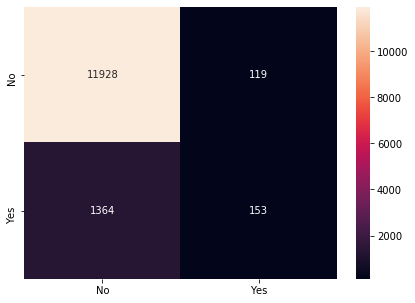

In [39]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Randon Forest Classifer

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train.values.ravel())


0.8897817752875258


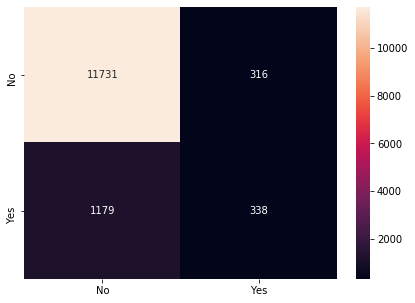

In [41]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Final observations

I tried to build the models with and without the 'duration' column. I observed a drop in the model accuracy of all the models when the duration colum was removed. It is mentioned in the info that I would be required to remove the duration column for a more realistic model, hence I left it removed. The 3 normal calssification algorithms seems to work great with scores touching 90. But when it comes to decision trees , when the'duration' column was removed, the score almost dropped by 7-8. Bagging seems to improve the model on both cases(with and without duration).Gradient boosting , though it has a good model score, It only found 153 number of true true cases while bagging and random forest classifier have +300 true cases found correctly. Logistic regression model also has a good model score but only predicted 14 true cases which seems to be very low. I think that bagging and random forest classifier are suited best for this problem.